In [1]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Chapitre 3: Matrices, portes logiques classiques et quantiques

## 1: Matrices et action sur un vecteur

Une matrice est (en gros) un tableau de nombres qui encode des opérations sur les vecteurs et à qui on impose des propriétés particulières:

*i)* **Addition de matrices**:

$\begin{pmatrix} a & b\\ c & d \end{pmatrix} + \begin{pmatrix} e & f\\ g & h \end{pmatrix} = \begin{pmatrix} a+e & b+f\\ c+g & d+h \end{pmatrix}$

*ii)* **Multiplication par un nombre**:

$\lambda \begin{pmatrix} a & b\\ c & d \end{pmatrix} = \begin{pmatrix} \lambda a & \lambda b\\\ \lambda c & \lambda d \end{pmatrix}$

iii) **Multiplication d'une matrice et d'un vecteur** ("plusieurs produits scalaires, ligne par ligne"):

$\begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} u \\ v \end{pmatrix} = \begin{pmatrix} au+bv \\ cu+dv \end{pmatrix}$

**IMPORTANT:** Effets d'une multiplication d'un vecteur par une matrice = rotation et/ou changement de longueur du vecteur:

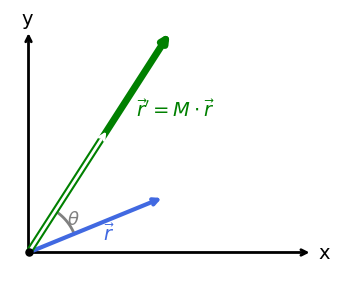

In [2]:

# --- Vector and linear transform parameters ---
r = np.array([2.2, 0.9])          # original vector \vec r (blue)
theta = np.radians(35)            # rotation angle of M
scale = 1.8                       # scaling of M (>1 stretch, <1 shrink)

R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
rot_dir = R @ r                                  # rotated direction (before scaling)
rot_dir /= np.linalg.norm(rot_dir)

r_rot_same_len = np.linalg.norm(r) * rot_dir     # rotate-only (same norm as r), blue on dashed ray
r_prime         = (scale * np.linalg.norm(r)) * rot_dir   # full transform r' = M r

M = scale * R                                    # transformation matrix

fig, ax = plt.subplots(figsize=(3.5, 3))

# --- Axes ---
ax.annotate("", xy=(4.6, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))
ax.annotate("", xy=(0, 3.6), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))
ax.text(4.7, -0.1, "x", fontsize=14)
ax.text(-0.12, 3.7, "y", fontsize=14)
ax.scatter(0, 0, s=26, color="black", zorder=5)

# --- Original vector r (blue) ---
ax.annotate("", xy=r, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=3, color="royalblue"))
ax.text(0.55*r[0], 0.55*r[1]-0.3, r"$\vec{r}$", color="royalblue", fontsize=14)

# --- Final transformed vector r' = M r (solid green) ---
ax.annotate("", xy=r_prime, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=5, color="green"))
ax.text(0.75*r_prime[0], 0.58*r_prime[1]+0.12,
        r"$\vec{r}' = M \cdot \vec{r}$", color="green", fontsize=14)

# --- Rotate-only vector, same length as r, along dashed ray (blue) ---
ax.annotate("", xy=r_rot_same_len, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="white"))

# --- Angle arc between r and rotated direction (gray) ---
phi = np.arctan2(rot_dir[1], rot_dir[0]) - np.arctan2(r[1], r[0])
# Normalize to [-pi, pi]
if phi <= -np.pi: phi += 2*np.pi
if phi >  np.pi:  phi -= 2*np.pi
base = np.arctan2(r[1], r[0])
ang = np.linspace(0, phi, 100)
rad = 0.8
ax.plot(rad*np.cos(base+ang), rad*np.sin(base+ang), color="gray", lw=2)
mid = base + phi/2
ax.text(1.02*rad*np.cos(mid), 1.02*rad*np.sin(mid)-0.06,
        r"$\theta$", color="gray", fontsize=13)

# --- Style ---
ax.set_xlim(-0.3, 4.7)
ax.set_ylim(-0.3, 3.8)
ax.set_aspect("equal", adjustable="box")
ax.axis("off")

plt.tight_layout()
plt.show()

### Produit de matrices

Enfin, on peut multiplier deux matrices ensemble. Un façon pratique de faire cela est d'imagniner que les colonnes d'une matrice sont des vecteurs. Ainsi, multiplier deux matrice revient à multiplier par la matrice de gauche chaque colonne-vecteur de la matrice de droite. Ainsi:

$$M_1^{} \times M_2^{} = \begin{pmatrix}
      a & b \\
      c & d
    \end{pmatrix}
    \begin{pmatrix}
      u_1^{} & u_2^{} \\
      v_1^{} & v_2^{}
    \end{pmatrix}
    =
    \begin{pmatrix}
      au_1^{} + bv_1^{} & au_2^{} + bv_2^{} \\
      cu_1^{} + dv_1^{} & cu_2^{} + dv_2^{}
    \end{pmatrix}
    $$

**Exemple**:
$$ M_1^{} \times M_2^{} = \begin{pmatrix}
      0 & 1 \\
      1 & 0
    \end{pmatrix}
    \begin{pmatrix}
      1 & 0 \\
      0 & -1
    \end{pmatrix} = 
    \begin{pmatrix}
    0 & -1\\
    1 & 0 
    \end{pmatrix}.$$

**Remarque**: Le produit matriciel n'est pas commutatif, c'est-à-dire, qu'en général, $M_1^{} \times M_2^{} \neq M_2^{} \times M_1^{}$. En effet,

$$ M_2^{} \times M_1^{} =\begin{pmatrix}
      1 & 0 \\
      0 & -1
    \end{pmatrix} 
    \begin{pmatrix}
      0 & 1 \\
      1 & 0
    \end{pmatrix}
     = 
    \begin{pmatrix}
    0 & 1\\
    -1 & 0 
    \end{pmatrix}.$$



$~$

## 2.3: Portes logiques

### 2.3.1: Portes logiques classiques

Les ordinateurs classiques (ceux que l'on utilise tous les jours) traitent de l'information écrite sous forme de **bits**, c'est-à-dire que l'information s'écrit à base de 0 et de 1. L'association de ces bits permet de former des nombres, mots, des symboles,... La façon de traiter ces informations se fait au travers d'opérations ou transformations que l'on peut effectuer sur ces bits grâce des **portes logiques**. Sans expliquer physiquement comment s'opèrent ces transfmormations, voici quelques exemples de portes logiques les plus utilisées dans circuits électronique:

- **NOT** (inverseur):

  <img src="../figures/chapitre2/NOT.png" width="200">

- **AND** (et):

  <img src="../figures/chapitre2/AND.png" width="200">

- **OR** (ou):

  <img src="../figures/chapitre2/OR.png" width="200">

- **XOR** (ou exclusif):

  <img src="../figures/chapitre2/XOR.png" width="200">

- **NAND**:
  
  <img src="../figures/chapitre2/NAND.png" width="200">


| Porte | Symbole logique | Expression              | Description              |
| :---- | :-------------- | :---------------------- | :----------------------- |
| NOT   | ¬A              | Inverse le bit d’entrée | 1→0, 0→1                 |
| AND   | A ⋅ B           | 1 si A=1 et B=1         | Porte « multiplication » |
| OR    | A + B           | 1 si A=1 ou B=1         | Porte « addition »       |
| XOR   | A ⊕ B           | 1 si A≠B                | « ou exclusif »          |
| NAND  | ¬(A⋅B)          | Inverse de AND          | Base universelle         |

Il est possible d'appliquer ces portes logiques à la chaîne et de former ainsi des **circuits logiques**. Nous donnons ci-dessous un circuit logique additioonnant deux bits (avec report via la porte **AND**):

  <img src="../figures/chapitre2/addition_circuit2.png" width="400">

### 2.3.2: Portes logiques quantiques à un qubit

Pour pouvoir manipuler l'information que renferment des qubits, il faut recourir à d'autres types d'opérations sur les vecteurs de probabilité quantiques, dfférentes de celles auxquelles on a recours sur les bits classiques. Effectuer un opération sur le système revient à modifier son état, ce qui est équivalent à modifier le vecteur de probabilité représentant cet état. Comme nous l'avons vu, cela se fait concrètement au travers de multiplications de ces vecteurs par des matrices.

Nous voulons ajouter une petite précision en passant: l'évolution dans le temps d'un état est décrite par l'équation de Schrödinger.

Dans le cas idéal où le système quantique n'intéragit que très peu avec son environnement, l'évolution d'un état dans le temps est appelée *unitaire*, c'est-à-dire que les matrices agissant sur l'état remplissent des conditions, qui font d'elles des *matrices unitaires*. On peut citer quelques exemples de ces matrices que nous retrouvons plus tard, lorsque nous discuterons des portes quantiques:

- **NOT-gate** or **X-gate** (effet identique à son équivalente classique):

$\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \ket{0} \quad \rightarrow \quad$ $\begin{pmatrix} 0&1\\ 1&0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \ket{1}$

$\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \ket{1} \quad \rightarrow \quad$ $\begin{pmatrix} 0&1\\ 1&0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \ket{0}$

L'état $\ket 0$ est envoyé sur $\ket 1$ et vice-versa.

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

- **Hadamard gate**: 

$\begin{pmatrix} 1 \\ 0 \end{pmatrix} (= \ket{0}) \quad \rightarrow \quad$ $ \frac{1}{\sqrt{2}} \begin{pmatrix} 1&1\\ 1&-1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} \left(= \frac{1}{\sqrt{2}} (\ket 0 + \ket 1) \right)$

$\begin{pmatrix} 0 \\ 1 \end{pmatrix} (= \ket{1}) \quad \rightarrow \quad$ $ \frac{1}{\sqrt{2}} \begin{pmatrix} 1&1\\ 1&-1 \end{pmatrix} \begin{pmatrix} 0\\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} \left(= \frac{1}{\sqrt{2}} (\ket 0 - \ket 1) \right)$

À partir d'un état "simple", on crée un état superposé. 

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

Nous allons à présent utiliser une librairie Python, appelée **QISKIT**, implémentée par IBM, permettant de manipuler des qubits et de créer des circuits logiques quantiques.